In [1]:
from pathlib import Path
from typing import Any, Dict, Tuple, Union

import os
import numpy as np
import PIL
import SimpleITK

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
def sitk_load(filepath: Union[str, Path]) -> Tuple[np.ndarray, Dict[str, Any]]:
    """Loads an image using SimpleITK and returns the image and its metadata.

    Args:
        filepath: Path to the image.

    Returns:
        - ([N], H, W), Image array.
        - Collection of metadata.
    """
    # Load image and save info
    image = SimpleITK.ReadImage(str(filepath))
    info = {"origin": image.GetOrigin(), "spacing": image.GetSpacing(), "direction": image.GetDirection()}

    # Extract numpy array from the SimpleITK image object
    im_array = np.squeeze(SimpleITK.GetArrayFromImage(image))

    return im_array, info

In [5]:
# Select the patient identification (scalar value between 1 and 45)
patient_id = 1
instant = 'frame01'

# Specify the ultrasound/segmentation pair to be loaded
patient_name = f"patient{patient_id:03d}"
path_to_bmode_image = f"training/{patient_name}/{patient_name}_{instant}.nii.gz"

# Call of a specific function that reads the .nii.gz files and gives access to the corresponding images and metadata
img, info = sitk_load(path_to_bmode_image)
voxelspacing = info['spacing']
num_slice, width, height = img.shape

# Display the corresponding useful information
print(f"{type(img)=}")
print(f"{img.dtype=}")
print(f"{img.shape=}")
print(f"{voxelspacing=}")
print(f"Nb slice= {num_slice}")
print('')

type(img)=<class 'numpy.ndarray'>
img.dtype=dtype('int16')
img.shape=(10, 256, 216)
voxelspacing=(1.5625, 1.5625, 10.0)
Nb slice= 10



NiftiImageIO (0x2f9112f0): training/patient001/patient001_frame01.nii.gz has unexpected scales in sform

NiftiImageIO (0x2f9112f0): training/patient001/patient001_frame01.nii.gz has unexpected scales in sform



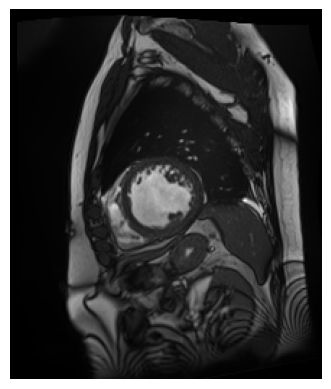

In [6]:
# Display one slice
fig, ax = plt.subplots()
ax.set_axis_off()
slice = num_slice//2
im = ax.imshow(img[slice], cmap='gray')

In [7]:
# Select the patient identification (scalar value between 1 and 45)
patient_id = 1
instant = '4d'

# Specify the ultrasound/segmentation pair to be loaded
patient_name = f"patient{patient_id:03d}"
path_to_bmode_image = f"training/{patient_name}/{patient_name}_{instant}.nii.gz"

print(patient_name)
print(path_to_bmode_image)

# Call of a specific function that reads the .nii.gz files and gives access to the corresponding images and metadata
seq, info = sitk_load(path_to_bmode_image)
voxelspacing = info['spacing']
img = seq[0]
num_frames, num_slice, width, height = seq.shape
# Display the corresponding useful information
print(f"{type(img)=}")
print(f"{img.dtype=}")
print(f"{img.shape=}")
print(f"{voxelspacing=}")
print(f"Nb frame= {num_frames}")
print('')

patient001
training/patient001/patient001_4d.nii.gz
type(img)=<class 'numpy.ndarray'>
img.dtype=dtype('int16')
img.shape=(10, 256, 216)
voxelspacing=(1.5625, 1.5625, 10.0, 1.0)
Nb frame= 30



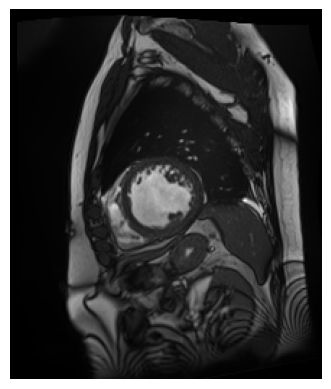

In [8]:
# Display one slice
fig, ax = plt.subplots()
ax.set_axis_off()
slice = num_slice//2
im = ax.imshow(seq[0][slice], cmap='gray')

In [10]:
# Initialisation function for the animation
def init():
    im.set_data(seq[0][slice])
    return [im]

# Animation function to update the current frame for display
def animate(i):
    im.set_array(seq[i][slice])
    return [im]

In [11]:
# Create animation
anim = FuncAnimation(fig, animate, init_func=init, frames=num_frames, interval=40, blit=True)

# Display the animation in the jupyter notebook
HTML(anim.to_jshtml())